In [1]:
# Import modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from functools import *
from google.colab import files

%tensorflow_version 1.x
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

TensorFlow 1.x selected.


In [2]:
uploaded = files.upload()
file_name = "heart.csv"

Saving heart.csv to heart.csv


### Reading Data and Prepare Dataset

In [3]:
import pandas as pd
dataset = pd.read_csv(file_name, delimiter=',')
print(dataset.shape)
dataset.head()

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [0]:
# Shuffle the dataset
# NOTE: shuffle dataframe in-place and reset the index
dataset = dataset.sample(frac=1).reset_index(drop=True)

# Convert Pandas Dataframe to Numpy dArray
dataset_np = dataset.values
X = dataset.drop('age', axis='columns').values
Y = dataset['age'].values

### Percent to Split

In [5]:
# Index for 30%
index_30percent = int(0.3 * len(dataset_np[:, 0]))
print(index_30percent)

# Index for 10%
index_10percent = int(0.1 * len(dataset_np[:, 0]))
print(index_10percent)

# Index for 90%
index_90percent = int(0.9 * len(dataset_np[:, 0]))
print(index_90percent)

90
30
272


### Normal Validation Dataset

In [6]:
# Split into training and validation
XVALID = X[:index_30percent, :]
YVALID = Y[:index_30percent]

XTRAIN = X[index_30percent:, :]
YTRAIN = Y[index_30percent:]

print(XTRAIN.shape)
print(YTRAIN.shape)

print(XVALID.shape)
print(YVALID.shape)


## Mean normalization
min = XTRAIN.min(axis = 0) 
max = XTRAIN.max(axis = 0) 
mean = XTRAIN.mean(axis = 0)
XTRAIN = (XTRAIN - mean) / (max - min)
XVALID = (XVALID - mean) / (max - min)

## Rescaling
Ymax = YTRAIN.max()
YTRAIN = YTRAIN / Ymax
YVALID = YVALID / Ymax

(213, 13)
(213,)
(90, 13)
(90,)


### Too Small Validation Dataset 

In [0]:
# Split into training and validation
XVALID10 = X[:index_10percent, :]
YVALID10 = Y[:index_10percent]

XTRAIN10 = X[index_10percent:, :]
YTRAIN10 = Y[index_10percent:]

## Mean normalization
min = XTRAIN10.min(axis = 0) 
max = XTRAIN10.max(axis = 0) 
mean = XTRAIN10.mean(axis = 0)
XTRAIN10 = (XTRAIN10 - mean) / (max - min)
XVALID10 = (XVALID10 - mean) / (max - min)

## Rescaling
Ymax = YTRAIN10.max()
YTRAIN10 = YTRAIN10 / Ymax
YVALID10 = YVALID10 / Ymax

### Too Small Training Set 

In [0]:
# Split into training and validation
XVALID90 = X[:index_90percent, :]
YVALID90 = Y[:index_90percent]

XTRAIN90 = X[index_90percent:, :]
YTRAIN90 = Y[index_90percent:]

## Mean normalization
min = XTRAIN90.min(axis = 0) 
max = XTRAIN90.max(axis = 0) 
mean = XTRAIN90.mean(axis = 0)
XTRAIN90 = (XTRAIN90 - mean) / (max - min)
XVALID90 = (XVALID90 - mean) / (max - min)

## Rescaling
Ymax = YTRAIN90.max()
YTRAIN90 = YTRAIN90 / Ymax
YVALID90 = YVALID90 / Ymax

### Learning Curve Function

In [0]:
def learning_curves(model_history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
    ax1.plot(model_history.history['loss'])
    ax1.plot(model_history.history['val_loss'])
    ax1.set_ylabel('loss')
    ax1.set_xlabel('epoch')
    ax1.legend(['training loss data', 'validation loss data'], loc='lower right')

    ax2.plot(model_history.history['mean_absolute_error'])
    ax2.plot(model_history.history['val_mean_absolute_error'])
    ax2.set_ylabel('error')
    ax2.set_xlabel('epoch')
    ax2.legend(['training error data', 'validation error data'], loc='lower right')

    fig.show()

## Build a neural network

In [10]:
model = Sequential()
model.add(Dense(13, input_dim=len(XTRAIN[0, :]), activation='relu'))
model.add(Dense(7, activation='relu'))
model.add(Dense(1, activation='linear'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [11]:
# Normal Dataset
model.compile(loss='mse', optimizer = 'adam', metrics=['mae'])
history = model.fit(XTRAIN, YTRAIN, validation_data=(XVALID, YVALID), epochs = 512, batch_size=100, verbose=1)

Train on 213 samples, validate on 90 samples
Epoch 1/512
213/213 [==============================] - 2s 8ms/sample - loss: 0.4157 - mean_absolute_error: 0.5831 - val_loss: 0.4006 - val_mean_absolute_error: 0.5784
Epoch 2/512
213/213 [==============================] - 0s 63us/sample - loss: 0.3830 - mean_absolute_error: 0.5558 - val_loss: 0.3682 - val_mean_absolute_error: 0.5485
Epoch 3/512
213/213 [==============================] - 0s 61us/sample - loss: 0.3531 - mean_absolute_error: 0.5309 - val_loss: 0.3396 - val_mean_absolute_error: 0.5230
Epoch 4/512
213/213 [==============================] - 0s 61us/sample - loss: 0.3269 - mean_absolute_error: 0.5085 - val_loss: 0.3134 - val_mean_absolute_error: 0.4986
Epoch 5/512
213/213 [==============================] - 0s 62us/sample - loss: 0.3038 - mean_absolute_error: 0.4890 - val_loss: 0.2897 - val_mean_absolute_error: 0.4747
Epoch 6/512
213/213 [==============================] - 0s 63us/sample - loss: 0.2818 - mean_absolute_error: 0.4687 -

### Learning Curves of Normal Dataset

{'batch_size': 100, 'epochs': 512, 'steps': None, 'samples': 213, 'verbose': 0, 'do_validation': True, 'metrics': ['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error']}


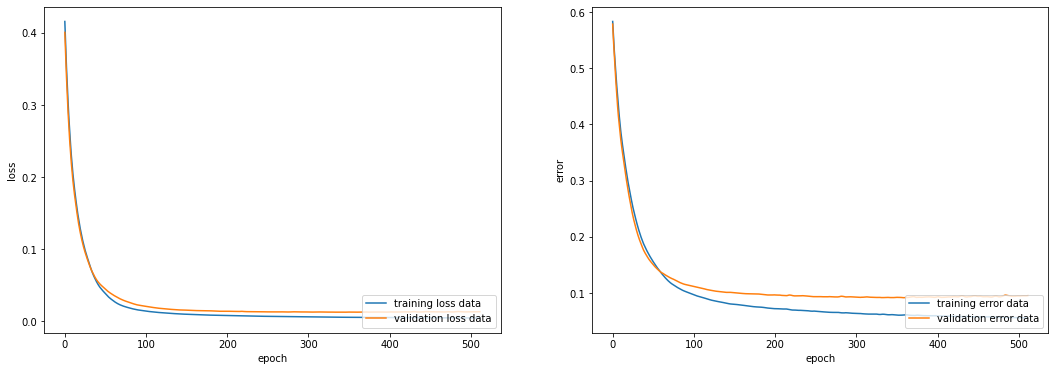

In [14]:
print(history.params)
learning_curves(history)

## Build a neural network (Small Valid)

In [0]:
modelsv = Sequential()
modelsv.add(Dense(13, input_dim=len(XTRAIN[0, :]), activation='relu'))
modelsv.add(Dense(7, activation='relu'))
modelsv.add(Dense(1, activation='linear'))

In [0]:
# Too Small Valid
modelsv.compile(loss='mse', optimizer = 'adam', metrics=['mae'])
historysv = modelsv.fit(XTRAIN10, YTRAIN10, validation_data=(XVALID10, YVALID10), epochs = 512, batch_size=100, verbose=0)

### Learning Curves of Too Small Valid

{'batch_size': 100, 'epochs': 512, 'steps': None, 'samples': 273, 'verbose': 0, 'do_validation': True, 'metrics': ['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error']}


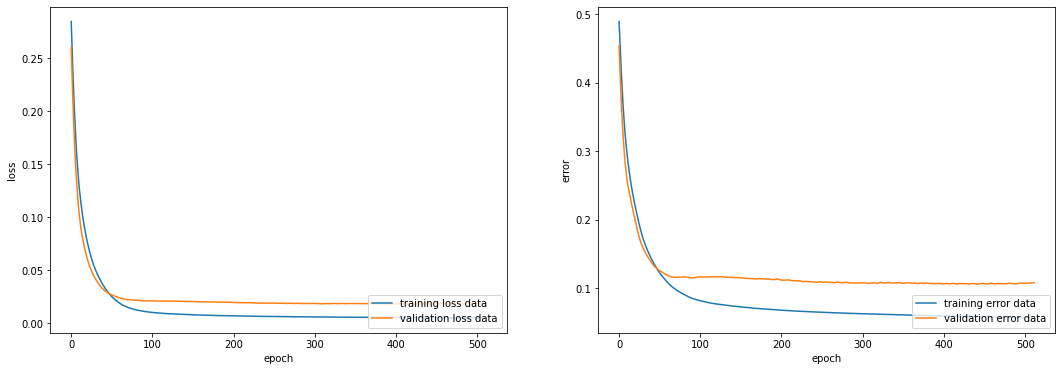

In [17]:
print(historysv.params)
learning_curves(historysv)

## Build a neural network (Small Training)

In [0]:
modelst = Sequential()
modelst.add(Dense(13, input_dim=len(XTRAIN[0, :]), activation='relu'))
modelst.add(Dense(7, activation='relu'))
modelst.add(Dense(1, activation='linear'))

In [0]:
# Too Small Valid
modelst.compile(loss='mse', optimizer = 'adam', metrics=['mae'])
historyst = modelst.fit(XTRAIN90, YTRAIN90, validation_data=(XVALID90, YVALID90), epochs = 512, batch_size=100, verbose=0)

### Learning Curves of Too Small Valid

{'batch_size': 100, 'epochs': 512, 'steps': None, 'samples': 31, 'verbose': 0, 'do_validation': True, 'metrics': ['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error']}


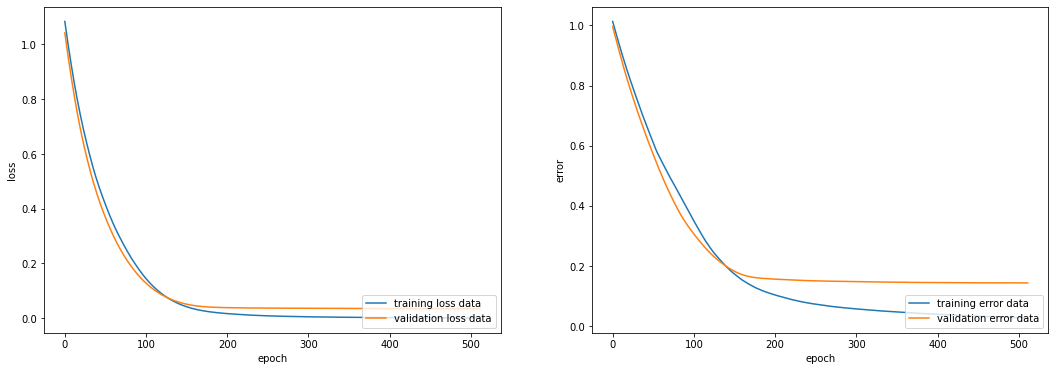

In [20]:
print(historyst.params)
learning_curves(historyst)

## Build a neural network (UNDERFIT)


In [0]:
modelu = Sequential()
modelu.add(Dense(13, input_dim=len(XTRAIN[0, :]), activation='relu'))
modelu.add(Dense(7, activation='relu'))
modelu.add(Dense(1, activation='linear'))

In [0]:
modelu.compile(loss='mse', optimizer = 'adam', metrics=['mae'])
historyu = modelu.fit(XTRAIN, YTRAIN, validation_data=(XVALID, YVALID), epochs = 10, batch_size=100, verbose=0)

### Learning Curves (UNDERFIT)

{'batch_size': 100, 'epochs': 10, 'steps': None, 'samples': 213, 'verbose': 0, 'do_validation': True, 'metrics': ['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error']}


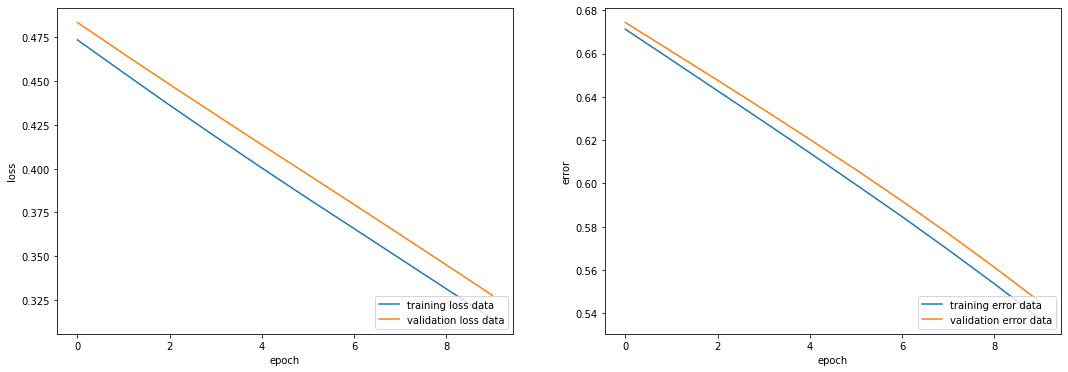

In [23]:
print(historyu.params)
learning_curves(historyu)

## Build a neural network (OVERFIT)


In [0]:
modelo = Sequential()
modelo.add(Dense(130, input_dim=len(XTRAIN[0, :]), activation='relu'))
modelo.add(Dense(130, activation='relu'))
modelo.add(Dense(1, activation='linear'))

In [0]:
modelo.compile(loss='mse', optimizer = 'adam', metrics=['mae'])
historyo = modelo.fit(XTRAIN, YTRAIN, validation_data=(XVALID, YVALID), epochs = 512, batch_size=100, verbose=0)

### Learning Curves (OVERFIT)

{'batch_size': 100, 'epochs': 512, 'steps': None, 'samples': 213, 'verbose': 0, 'do_validation': True, 'metrics': ['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error']}


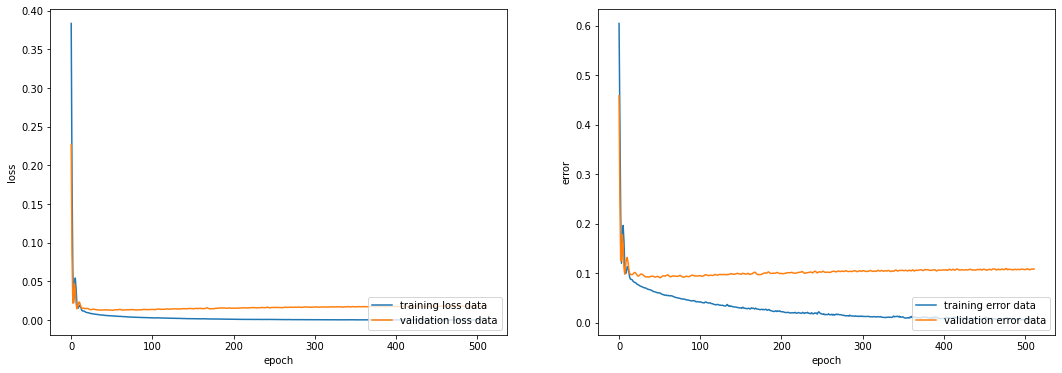

In [26]:
print(historyo.params)
learning_curves(historyo)